## Lab7
#### name: Zeng Yuhang
#### ID: 222320008
#### variant: 4

**1. Investigate features of my variant:**
- Draw histograms for features
- Draw scatter plot matrix of features. 
- Write comments about my investigation: what features are most useful for solving the problem and why, how features are distributed in the data.

In [1]:
# Draw histograms for features
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')

df = pd.read_csv('./variants/4/abalone.data', header=None)

df.replace("M", 1, inplace=True)
df.replace("F", 2, inplace=True)
df.replace("I", 3, inplace=True)

df.head()

,0,1,2,3,4,5,6,7,8
0,1,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,1,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,3,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [2]:
x, y = df.shape
print(x, y)

4177 9


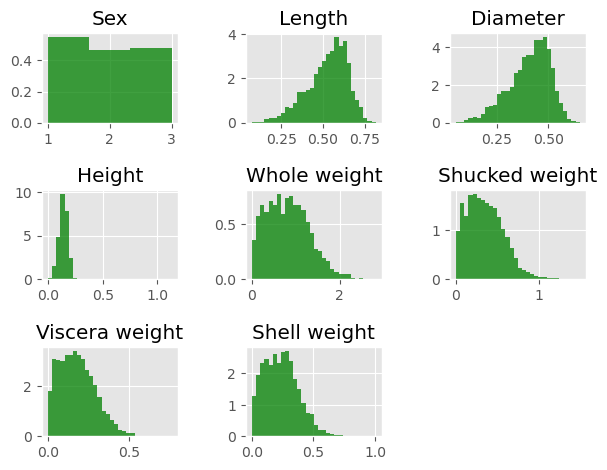

In [7]:
plt.figure()

plt.subplot(331)
plt.hist(df[0], 3, density=True, facecolor='g', alpha=0.75)
plt.title('Sex')
plt.grid(True)

plt.subplot(332)
plt.hist(df[1], 30, density=True, facecolor='g', alpha=0.75)
plt.title('Length')
plt.grid(True)

plt.subplot(333)
plt.hist(df[2], 30, density=True, facecolor='g', alpha=0.75)
plt.title('Diameter')
plt.grid(True)

plt.subplot(334)
plt.hist(df[3], 30, density=True, facecolor='g', alpha=0.75)
plt.title('Height')
plt.grid(True)

plt.subplot(335)
plt.hist(df[4], 30, density=True, facecolor='g', alpha=0.75)
plt.title('Whole weight')
plt.grid(True)

plt.subplot(336)
plt.hist(df[5], 30, density=True, facecolor='g', alpha=0.75)
plt.title('Shucked weight')
plt.grid(True)

plt.subplot(337)
plt.hist(df[6], 30, density=True, facecolor='g', alpha=0.75)
plt.title('Viscera weight')
plt.grid(True)

plt.subplot(338)
plt.hist(df[7], 30, density=True, facecolor='g', alpha=0.75)
plt.title('Shell weight')
plt.grid(True)

plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.75, wspace=0.5)
plt.show()

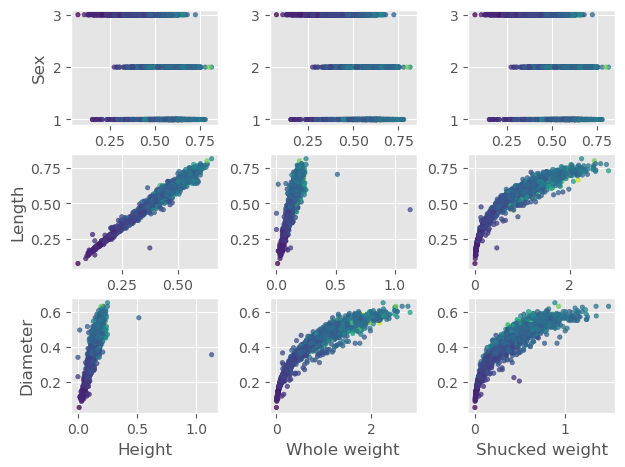

In [14]:
# Draw scatter plot matrix of features
colors = np.array(df[8])

plt.figure()

plt.subplot(331)
plt.scatter(df[1], df[0], s=10, c=colors, alpha=0.75)
plt.xlabel('Length')
plt.ylabel('Sex')
plt.grid(True)

plt.subplot(332)
plt.scatter(df[1], df[0], s=10, c=colors, alpha=0.75)
plt.xlabel('Diameter')
plt.grid(True)

plt.subplot(333)
plt.scatter(df[1], df[0], s=10, c=colors, alpha=0.75)
plt.xlabel('Height')
plt.grid(True)

plt.subplot(334)
plt.scatter(df[2], df[1], s=10, c=colors, alpha=0.75)
plt.xlabel('Diameter')
plt.ylabel('Length')
plt.grid(True)

plt.subplot(335)
plt.scatter(df[3], df[1], s=10, c=colors, alpha=0.75)
plt.xlabel('Height')
plt.grid(True)

plt.subplot(336)
plt.scatter(df[4], df[1], s=10, c=colors, alpha=0.75)
plt.xlabel('Whole weight')
plt.grid(True)

plt.subplot(337)
plt.scatter(df[3], df[2], s=10, c=colors, alpha=0.75)
plt.xlabel('Height')
plt.ylabel('Diameter')
plt.grid(True)

plt.subplot(338)
plt.scatter(df[4], df[2], s=10, c=colors, alpha=0.75)
plt.xlabel('Whole weight')
plt.grid(True)

plt.subplot(339)
plt.scatter(df[5], df[2], s=10, c=colors, alpha=0.75)
plt.xlabel('Shucked weight')
plt.grid(True)

plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25, wspace=0.35)
plt.show()

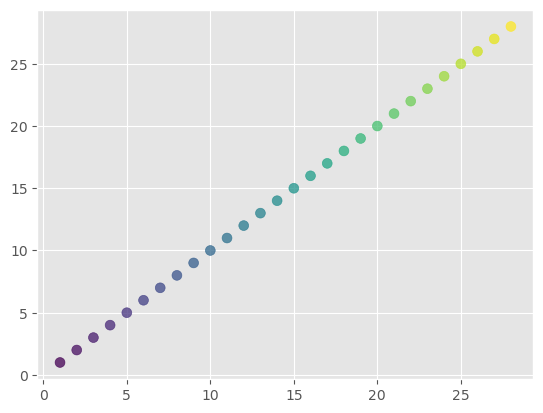

In [9]:
plt.scatter(np.arange(1,29), np.arange(1,29), s=50, c=np.arange(1,29), alpha=0.75)
plt.show()

In [ ]:
# Write comments about my investigation: what features are most useful for solving the problem and why, how features are distributed in the data

According to the scatter plot matrix of features, all the plots show a clear trend that the color getting lighter when number increases. The lighter the color is, the older the abalone is. Together with an interesting phenomenone that female abalones are always larger than male ones in many directions.

Most features basically conform to normal distribution with long-tail.

**2. Investigate the API of probabilistic models in scikit-learn and train models for my task**
- try train *Gaussian mixture model* and *Logistic regression model*.
- Estimate the results of training.
- Try to change parameters of training, apply transformations to features or create new features to achieve better results.

In [39]:
cnames = {
'aliceblue':            '#F0F8FF',
'antiquewhite':         '#FAEBD7',
'aqua':                 '#00FFFF',
'aquamarine':           '#7FFFD4',
'azure':                '#F0FFFF',
'beige':                '#F5F5DC',
'bisque':               '#FFE4C4',
'black':                '#000000',
'blanchedalmond':       '#FFEBCD',
'blue':                 '#0000FF',
'blueviolet':           '#8A2BE2',
'brown':                '#A52A2A',
'burlywood':            '#DEB887',
'cadetblue':            '#5F9EA0',
'chartreuse':           '#7FFF00',
'chocolate':            '#D2691E',
'coral':                '#FF7F50',
'cornflowerblue':       '#6495ED',
'cornsilk':             '#FFF8DC',
'crimson':              '#DC143C',
'cyan':                 '#00FFFF',
'darkblue':             '#00008B',
'darkcyan':             '#008B8B',
'darkgoldenrod':        '#B8860B',
'darkgray':             '#A9A9A9',
'darkgreen':            '#006400',
'darkkhaki':            '#BDB76B',
'darkmagenta':          '#8B008B',
'darkolivegreen':       '#556B2F',
'darkorange':           '#FF8C00',
'darkorchid':           '#9932CC',
'darkred':              '#8B0000',
'darksalmon':           '#E9967A',
'darkseagreen':         '#8FBC8F',
'darkslateblue':        '#483D8B',
'darkslategray':        '#2F4F4F',
'darkturquoise':        '#00CED1',
'darkviolet':           '#9400D3',
'deeppink':             '#FF1493',
'deepskyblue':          '#00BFFF',
'dimgray':              '#696969',
'dodgerblue':           '#1E90FF',
'firebrick':            '#B22222',
'floralwhite':          '#FFFAF0',
'forestgreen':          '#228B22',
'fuchsia':              '#FF00FF',
'gainsboro':            '#DCDCDC',
'ghostwhite':           '#F8F8FF',
'gold':                 '#FFD700',
'goldenrod':            '#DAA520',
'gray':                 '#808080',
'green':                '#008000',
'greenyellow':          '#ADFF2F',
'honeydew':             '#F0FFF0',
'hotpink':              '#FF69B4',
'indianred':            '#CD5C5C',
'indigo':               '#4B0082',
'ivory':                '#FFFFF0',
'khaki':                '#F0E68C',
'lavender':             '#E6E6FA',
'lavenderblush':        '#FFF0F5',
'lawngreen':            '#7CFC00',
'lemonchiffon':         '#FFFACD',
'lightblue':            '#ADD8E6',
'lightcoral':           '#F08080',
'lightcyan':            '#E0FFFF',
'lightgoldenrodyellow': '#FAFAD2',
'lightgreen':           '#90EE90',
'lightgray':            '#D3D3D3',
'lightpink':            '#FFB6C1',
'lightsalmon':          '#FFA07A',
'lightseagreen':        '#20B2AA',
'lightskyblue':         '#87CEFA',
'lightslategray':       '#778899',
'lightsteelblue':       '#B0C4DE',
'lightyellow':          '#FFFFE0',
'lime':                 '#00FF00',
'limegreen':            '#32CD32',
'linen':                '#FAF0E6',
'magenta':              '#FF00FF',
'maroon':               '#800000',
'mediumaquamarine':     '#66CDAA',
'mediumblue':           '#0000CD',
'mediumorchid':         '#BA55D3',
'mediumpurple':         '#9370DB',
'mediumseagreen':       '#3CB371',
'mediumslateblue':      '#7B68EE',
'mediumspringgreen':    '#00FA9A',
'mediumturquoise':      '#48D1CC',
'mediumvioletred':      '#C71585',
'midnightblue':         '#191970',
'mintcream':            '#F5FFFA',
'mistyrose':            '#FFE4E1',
'moccasin':             '#FFE4B5',
'navajowhite':          '#FFDEAD',
'navy':                 '#000080',
'oldlace':              '#FDF5E6',
'olive':                '#808000',
'olivedrab':            '#6B8E23',
'orange':               '#FFA500',
'orangered':            '#FF4500',
'orchid':               '#DA70D6',
'palegoldenrod':        '#EEE8AA',
'palegreen':            '#98FB98',
'paleturquoise':        '#AFEEEE',
'palevioletred':        '#DB7093',
'papayawhip':           '#FFEFD5',
'peachpuff':            '#FFDAB9',
'peru':                 '#CD853F',
'pink':                 '#FFC0CB',
'plum':                 '#DDA0DD',
'powderblue':           '#B0E0E6',
'purple':               '#800080',
'red':                  '#FF0000',
'rosybrown':            '#BC8F8F',
'royalblue':            '#4169E1',
'saddlebrown':          '#8B4513',
'salmon':               '#FA8072',
'sandybrown':           '#FAA460',
'seagreen':             '#2E8B57',
'seashell':             '#FFF5EE',
'sienna':               '#A0522D',
'silver':               '#C0C0C0',
'skyblue':              '#87CEEB',
'slateblue':            '#6A5ACD',
'slategray':            '#708090',
'snow':                 '#FFFAFA',
'springgreen':          '#00FF7F',
'steelblue':            '#4682B4',
'tan':                  '#D2B48C',
'teal':                 '#008080',
'thistle':              '#D8BFD8',
'tomato':               '#FF6347',
'turquoise':            '#40E0D0',
'violet':               '#EE82EE',
'wheat':                '#F5DEB3',
'white':                '#FFFFFF',
'whitesmoke':           '#F5F5F5',
'yellow':               '#FFFF00',
'yellowgreen':          '#9ACD32'}

In [171]:
from sklearn.model_selection import train_test_split

X = np.array(df.loc[:, 1:])
y = np.array(df.loc[:,0])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

X_train.shape, y_train.shape

((3341, 8), (3341,))

C:\Users\10202\AppData\Local\Temp\ipykernel_23828\1328137724.py:50: RuntimeWarning: Mean of empty slice.
  [X_train[y_train == i].mean(axis=0) for i in range(1, n_classes + 1)]
c:\Users\10202\.conda\envs\Orc\lib\site-packages\numpy\core\_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
C:\Users\10202\AppData\Local\Temp\ipykernel_23828\1328137724.py:50: RuntimeWarning: Mean of empty slice.
  [X_train[y_train == i].mean(axis=0) for i in range(1, n_classes + 1)]
c:\Users\10202\.conda\envs\Orc\lib\site-packages\numpy\core\_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
c:\Users\10202\.conda\envs\Orc\lib\site-packages\sklearn\mixture\_base.py:274: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn(
C:\Users\10202\AppData\Local\Temp\ipykernel_23828\1328137724.py:50: RuntimeWarning: Mean of empty slic

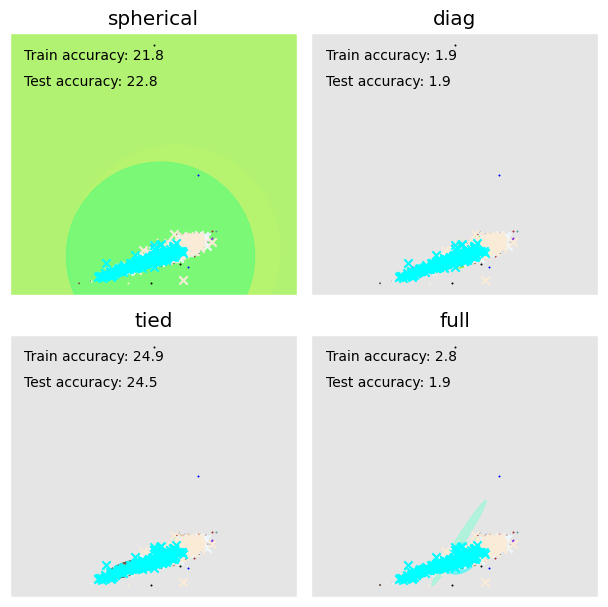

In [192]:
import matplotlib as mpl

from sklearn.mixture import GaussianMixture

colors = np.array(list(cnames.keys()))[:29]

def make_ellipses(gmm, ax):
    for n, color in enumerate(colors):
        if gmm.covariance_type == "full":
            covariances = gmm.covariances_[n][1:3, 1:3]
        elif gmm.covariance_type == "tied":
            covariances = gmm.covariances_[1:3, 1:3]
        elif gmm.covariance_type == "diag":
            covariances = np.diag(gmm.covariances_[n][1:3])
        elif gmm.covariance_type == "spherical":
            covariances = np.eye(gmm.means_.shape[1]) * gmm.covariances_[n]
        v, w = np.linalg.eigh(covariances)
        u = w[0] / np.linalg.norm(w[0])
        angle = np.arctan2(u[1], u[0])
        angle = 180 * angle / np.pi  # convert to degrees
        v = 2.0 * np.sqrt(2.0) * np.sqrt(v)
        ell = mpl.patches.Ellipse(
            gmm.means_[n, 1:3], v[0], v[1], angle=180 + angle, color=color
        )
        ell.set_clip_box(ax.bbox)
        ell.set_alpha(0.5)
        ax.add_artist(ell)
        ax.set_aspect("equal", "datalim")

n_classes = 29

estimators = {
    cov_type: GaussianMixture(
        n_components=n_classes, covariance_type=cov_type, max_iter=20, random_state=0
    )
    for cov_type in ["spherical", "diag", "tied", "full"]
}

n_estimators = len(estimators)

plt.figure(figsize=(3 * n_estimators // 2, 6))
plt.subplots_adjust(
    bottom=0.01, top=0.95, hspace=0.15, wspace=0.05, left=0.01, right=0.99
)

for index, (name, estimator) in enumerate(estimators.items()):
    # Since we have class labels for the training data, we can
    # initialize the GMM parameters in a supervised manner.
    estimator.means_init = np.nan_to_num(np.array(
        [X_train[y_train == i].mean(axis=0) for i in range(1, n_classes + 1)]
    ))
    # Train the other parameters using the EM algorithm.
    estimator.fit(X_train)

    h = plt.subplot(2, n_estimators // 2, index + 1)
    make_ellipses(estimator, h)

    for n, color in enumerate(colors):
        data = X[target == n + 1]
        plt.scatter(
            data[:, 1], data[:, 2], s=0.8, color=color, label=n + 1
        )
    # Plot the test data with crosses
    for n, color in enumerate(colors):
        data = X_test[y_test == n + 1]
        plt.scatter(data[:, 1], data[:, 2], marker="x", color=color)

    y_train_pred = estimator.predict(X_train)
    train_accuracy = np.mean(y_train_pred.ravel() == y_train.ravel()) * 100
    plt.text(0.05, 0.9, "Train accuracy: %.1f" % train_accuracy, transform=h.transAxes)

    y_test_pred = estimator.predict(X_test)
    test_accuracy = np.mean(y_test_pred.ravel() == y_test.ravel()) * 100
    plt.text(0.05, 0.8, "Test accuracy: %.1f" % test_accuracy, transform=h.transAxes)

    plt.xticks(())
    plt.yticks(())
    plt.title(name)

# plt.legend(scatterpoints=1, loc="lower right", prop=dict(size=12))


plt.show()

In [136]:
X = np.array(df.loc[:, :7])
Y = np.array(df.loc[:, 8])

X.shape, Y.shape

((4177, 8), (4177,))

In [144]:
from sklearn.model_selection import GridSearchCV


def gmm_bic_score(estimator, X):
    """Callable to pass to GridSearchCV that will use the BIC score."""
    # Make it negative since GridSearchCV expects a score to maximize
    return -estimator.bic(X)


param_grid = {
    "n_components": range(1, 30),
    "covariance_type": ["spherical", "tied", "diag", "full"],
}
grid_search = GridSearchCV(
    GaussianMixture(), param_grid=param_grid, scoring=gmm_bic_score
)
grid_search.fit(X)

GridSearchCV(estimator=GaussianMixture(),
             param_grid={'covariance_type': ['spherical', 'tied', 'diag',
                                             'full'],
                         'n_components': range(1, 30)},
             scoring=<function gmm_bic_score at 0x0000016CB87C9000>)

In [145]:
df_tmp = pd.DataFrame(grid_search.cv_results_)[
    ["param_n_components", "param_covariance_type", "mean_test_score"]
]
df_tmp["mean_test_score"] = -df_tmp["mean_test_score"]
df_tmp = df_tmp.rename(
    columns={
        "param_n_components": "Number of components",
        "param_covariance_type": "Type of covariance",
        "mean_test_score": "BIC score",
    }
)
df_tmp.sort_values(by="BIC score").head()

,Number of components,Type of covariance,BIC score
94,8,full,-29071.822462
92,6,full,-29062.674928
93,7,full,-29054.836104
96,10,full,-28910.585739
95,9,full,-28795.773356


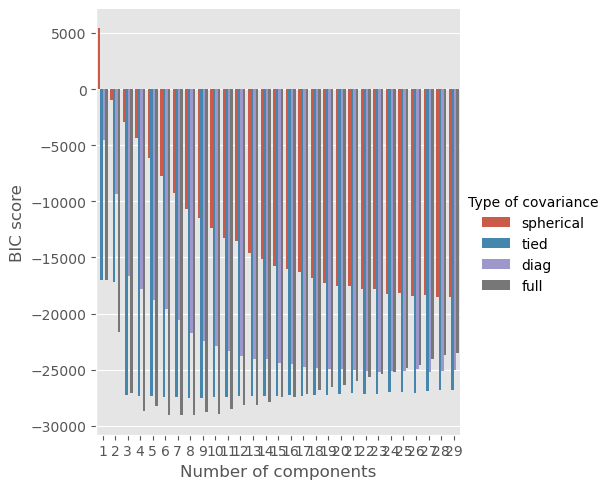

In [146]:
import seaborn as sns

sns.catplot(
    data=df_tmp,
    kind="bar",
    x="Number of components",
    y="BIC score",
    hue="Type of covariance",
)
plt.show()

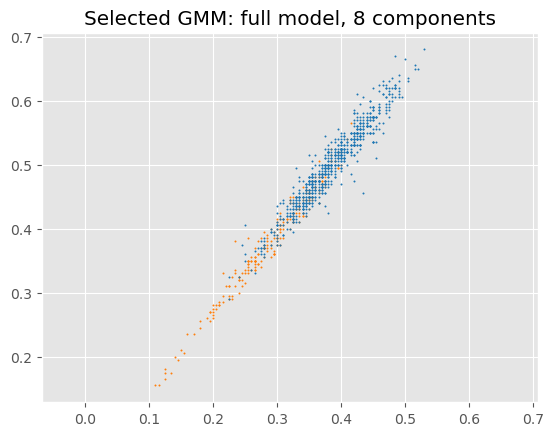

In [147]:
from matplotlib.patches import Ellipse
from scipy import linalg

color_iter = sns.color_palette("tab10", 2)[::-1]
Y_ = grid_search.predict(X)

fig, ax = plt.subplots()

for i, (mean, cov, color) in enumerate(
    zip(
        grid_search.best_estimator_.means_,
        grid_search.best_estimator_.covariances_,
        color_iter,
    )
):
    v, w = linalg.eigh(cov)
    if not np.any(Y_ == i):
        continue
    plt.scatter(X[Y_ == i, 2], X[Y_ == i, 1], 0.8, color=color)

    angle = np.arctan2(w[2][1], w[2][2])
    angle = 180.0 * angle / np.pi  # convert to degrees
    v = 2.0 * np.sqrt(2.0) * np.sqrt(v)
    ellipse = Ellipse(mean, v[2], v[1], angle=180.0 + angle, color=color)
    ellipse.set_clip_box(fig.bbox)
    ellipse.set_alpha(0.5)
    ax.add_artist(ellipse)

plt.title(
    f"Selected GMM: {grid_search.best_params_['covariance_type']} model, "
    f"{grid_search.best_params_['n_components']} components"
)
plt.axis("equal")
plt.show()

In [150]:
from sklearn.utils.extmath import row_norms

X = np.array(df.loc[:, :7])
y_true = np.array(df.loc[:, 8])

n_samples = X.shape[0]
n_components = 29
x_squared_norms = row_norms(X, squared=True)

Automatically created module for IPython interactive environment


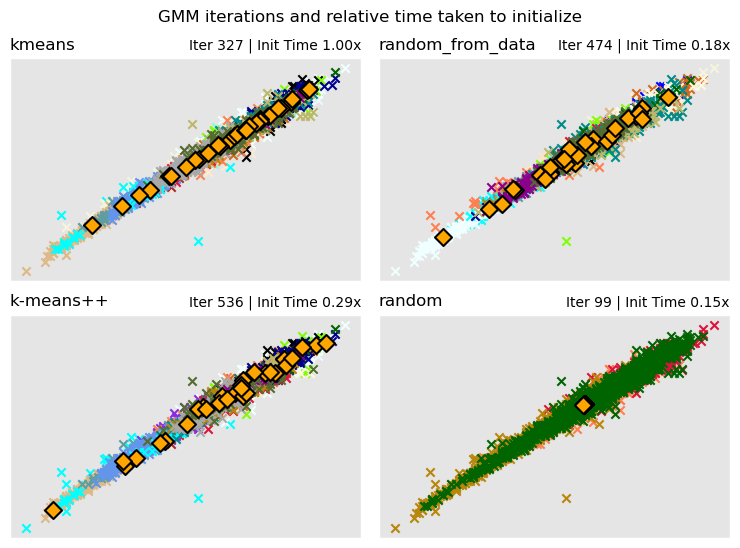

In [155]:
from sklearn.datasets._samples_generator import make_blobs
from timeit import default_timer as timer

print(__doc__)

def get_initial_means(X, init_params, r):
    # Run a GaussianMixture with max_iter=0 to output the initalization means
    gmm = GaussianMixture(
        n_components=29, init_params=init_params, tol=1e-9, max_iter=0, random_state=r
    ).fit(X)
    return gmm.means_

methods = ["kmeans", "random_from_data", "k-means++", "random"]
colors = np.array(list(cnames.keys()))[:29]
times_init = {}
relative_times = {}

plt.figure(figsize=(4 * len(methods) // 2, 6))
plt.subplots_adjust(
    bottom=0.1, top=0.9, hspace=0.15, wspace=0.05, left=0.05, right=0.95
)

for n, method in enumerate(methods):
    r = np.random.RandomState(seed=1234)
    plt.subplot(2, len(methods) // 2, n + 1)

    start = timer()
    ini = get_initial_means(X, method, r)
    end = timer()
    init_time = end - start

    gmm = GaussianMixture(
        n_components=29, means_init=ini, tol=1e-9, max_iter=2000, random_state=r
    ).fit(X)

    times_init[method] = init_time
    for i, color in enumerate(colors):
        data = X[gmm.predict(X) == i]
        plt.scatter(data[:, 2], data[:, 1], color=color, marker="x")

    plt.scatter(
        ini[:, 2], ini[:, 1], s=75, marker="D", c="orange", lw=1.5, edgecolors="black"
    )
    relative_times[method] = times_init[method] / times_init[methods[0]]

    plt.xticks(())
    plt.yticks(())
    plt.title(method, loc="left", fontsize=12)
    plt.title(
        "Iter %i | Init Time %.2fx" % (gmm.n_iter_, relative_times[method]),
        loc="right",
        fontsize=10,
    )
plt.suptitle("GMM iterations and relative time taken to initialize")
plt.show()

In [157]:
X = np.array(df.loc[:, :7])
y_true = np.array(df.loc[:, 8])

c:\Users\10202\.conda\envs\Orc\lib\site-packages\sklearn\mixture\_base.py:274: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn(


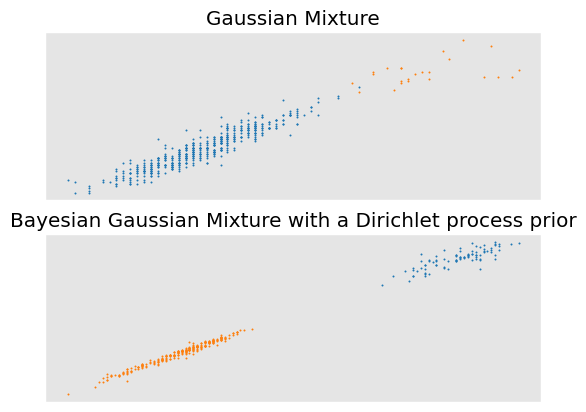

In [162]:
import itertools
from scipy import linalg

def plot_results(X, Y_, means, covariances, index, title):
    splot = plt.subplot(2, 1, 1 + index)
    for i, (mean, covar, color) in enumerate(zip(means, covariances, color_iter)):
        v, w = linalg.eigh(covar)
        v = 2.0 * np.sqrt(2.0) * np.sqrt(v)
        u = w[2] / linalg.norm(w[2])
        # as the DP will not use every component it has access to
        # unless it needs it, we shouldn't plot the redundant
        # components.
        if not np.any(Y_ == i):
            continue
        plt.scatter(X[Y_ == i, 2], X[Y_ == i, 1], 0.8, color=color)

        # Plot an ellipse to show the Gaussian component
        angle = np.arctan(u[1] / u[2])
        angle = 180.0 * angle / np.pi  # convert to degrees
        ell = mpl.patches.Ellipse(mean, v[2], v[1], angle=180.0 + angle, color=color)
        ell.set_clip_box(splot.bbox)
        ell.set_alpha(0.5)
        splot.add_artist(ell)

    plt.xticks(())
    plt.yticks(())
    plt.title(title)

gmm = mixture.GaussianMixture(n_components=29, covariance_type="full").fit(X)
plot_results(X, gmm.predict(X), gmm.means_, gmm.covariances_, 0, "Gaussian Mixture")

dpgmm = mixture.BayesianGaussianMixture(n_components=29, covariance_type="full").fit(X)
plot_results(
    X,
    dpgmm.predict(X),
    dpgmm.means_,
    dpgmm.covariances_,
    1,
    "Bayesian Gaussian Mixture with a Dirichlet process prior",
)

plt.show()

In [173]:
from sklearn.model_selection import train_test_split

X = np.array(df.loc[:, 1:])
y = np.array(df.loc[:,0])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

X_train.shape, y_train.shape

((3341, 8), (3341,))

In [178]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=0).fit(X_train, y_train)
y_train_pred = clf.predict(X_train)
train_accuracy = np.mean(y_train_pred.ravel() == y_train.ravel()) * 100
print("Train accuracy: %.1f" % train_accuracy)

y_test_pred = clf.predict(X_test)
test_accuracy = np.mean(y_test_pred.ravel() == y_test.ravel()) * 100
print("Test accuracy: %.1f" % test_accuracy)

Train accuracy: 55.0
Test accuracy: 56.9


c:\Users\10202\.conda\envs\Orc\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**3. Draw likelihood plot for you task and try to define outliers in the data.**

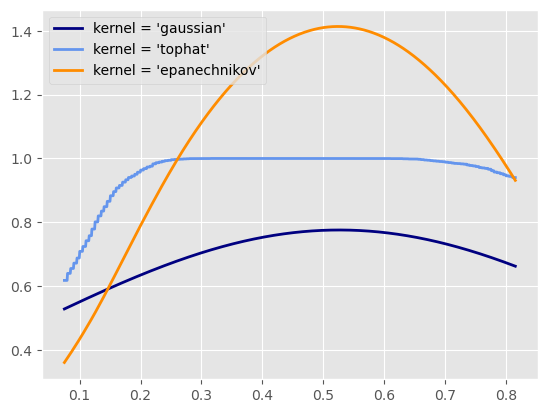

In [194]:
from scipy.stats import norm
from sklearn.neighbors import KernelDensity

fig, ax = plt.subplots()
colors = ["navy", "cornflowerblue", "darkorange"]
kernels = ["gaussian", "tophat", "epanechnikov"]
lw = 2
X_plot = np.linspace(0.075, 0.815, 1000)[:, np.newaxis]

for color, kernel in zip(colors, kernels):
    kde = KernelDensity(kernel=kernel, bandwidth=0.5).fit(np.array(df[1]).reshape(-1, 1))
    log_dens = kde.score_samples(X_plot)
    ax.plot(
        X_plot[:, 0],
        np.exp(log_dens),
        color=color,
        lw=lw,
        linestyle="-",
        label="kernel = '{0}'".format(kernel),
    )
ax.legend(loc="upper left")
plt.show()

**8. Write a short report in your notebook about the results of the experiment.**

Logistic regression model performs better than Gaussian mixture model using category objects. This question should not consider as a categorition. However, I was strugled to change the Gaussian mixture model into regression model. Because I find that I need to confirm a parameter 'n_components' before training the model. I hope I can overcome this problem in the future.